In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [22]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
newest_date = session.query(measurement.date).order_by(desc(measurement.date)).first().date

NameError: name 'desc' is not defined

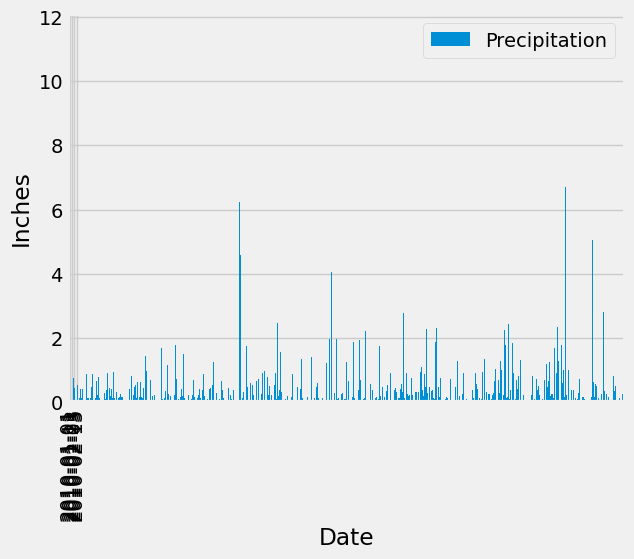

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year = int(newest_date[0:4])      
past_year = str(year - 1)         
one_year_ago = past_year + newest_date[4:]    

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date,measurement.prcp).filter(measurement.date >= one_year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.read_sql(precipitation_data.statement,engine)
precipitation_df.columns = ['Date','Precipitation']

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by = 'Date').reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_plot_df = precipitation_df.groupby('Date').max().reset_index()
xticks_index = np.arange(0,365,round(365/5))
precipitation_plot = precipitation_df.plot(x='Date',y='Precipitation', kind='bar',xticks = xticks_index, width=4)
precipitation_plot.set_xticklabels(precipitation_df['Date'].loc[xticks_index])
precipitation_plot.set_ylabel("Inches")
precipitation_plot.figsize=(3,3)
plt.show(precipitation_plot)


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(desc(func.count(measurement.station)))
active_stations.all()

NameError: name 'desc' is not defined

In [32]:
# Using the most active station id from the previous query 
most_active = active_stations.first()[0]

#calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
.filter(measurement.station == station_max).all()

NameError: name 'active_stations' is not defined

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plot_df = session.query(measurement.tobs).filter(measurement.date >= year_ago).\
filter(measurement.station == station_max).all()
plot_array = [row[0] for row in plot_df]
plt.hist(plot_array, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [16]:
# Close Session
session.close()